In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC


In [74]:
df = pd.read_csv("survival.csv")
print("FIRST 5 ROWS OF DATASET")
print(df.head())


FIRST 5 ROWS OF DATASET
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.

SURVIVAL CLASS DISTRIBUTION
                     Count  Percentage
Did Not Survive (0)    549       61.62
Survived (1)           342       38.38


C:\Users\nagar\AppData\Local\Temp\ipykernel_11136\1454927075.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_df.index, y=class_df['Count'], palette='pastel')


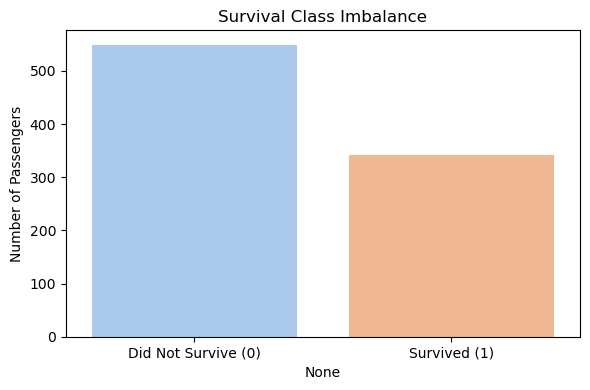

In [75]:
print("SURVIVAL CLASS DISTRIBUTION")
print("==============================")
class_counts = df['Survived'].value_counts()
class_percent = df['Survived'].value_counts(normalize=True) * 100
class_df = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percent.round(2)
})
class_df.index = ['Did Not Survive (0)', 'Survived (1)']
print(class_df)

# Plot class imbalance
plt.figure(figsize=(6, 4))
sns.barplot(x=class_df.index, y=class_df['Count'], palette='pastel')
plt.title("Survival Class Imbalance")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


             Total Missing  Missing Percentage
Cabin                  687           77.104377
Age                    177           19.865320
Embarked                 2            0.224467
PassengerId              0            0.000000
Survived                 0            0.000000
Pclass                   0            0.000000
Name                     0            0.000000
Sex                      0            0.000000
SibSp                    0            0.000000
Parch                    0            0.000000
Ticket                   0            0.000000
Fare                     0            0.000000


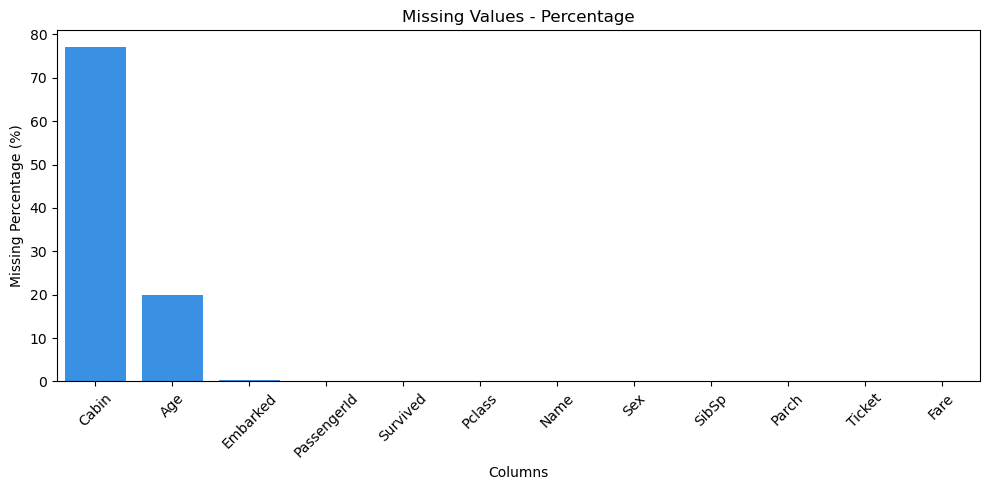

In [67]:
null_count = df.isnull().sum()
null_percent = (null_count / len(df)) * 100
missing_df = pd.DataFrame({
    'Total Missing': null_count,
    'Missing Percentage': null_percent
}).sort_values(by='Missing Percentage', ascending=False)
print(missing_df)

plt.figure(figsize=(10, 5))
sns.barplot(x=missing_df.index, y=missing_df['Missing Percentage'], color='dodgerblue')
plt.title("Missing Values - Percentage")
plt.xlabel("Columns")
plt.ylabel("Missing Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



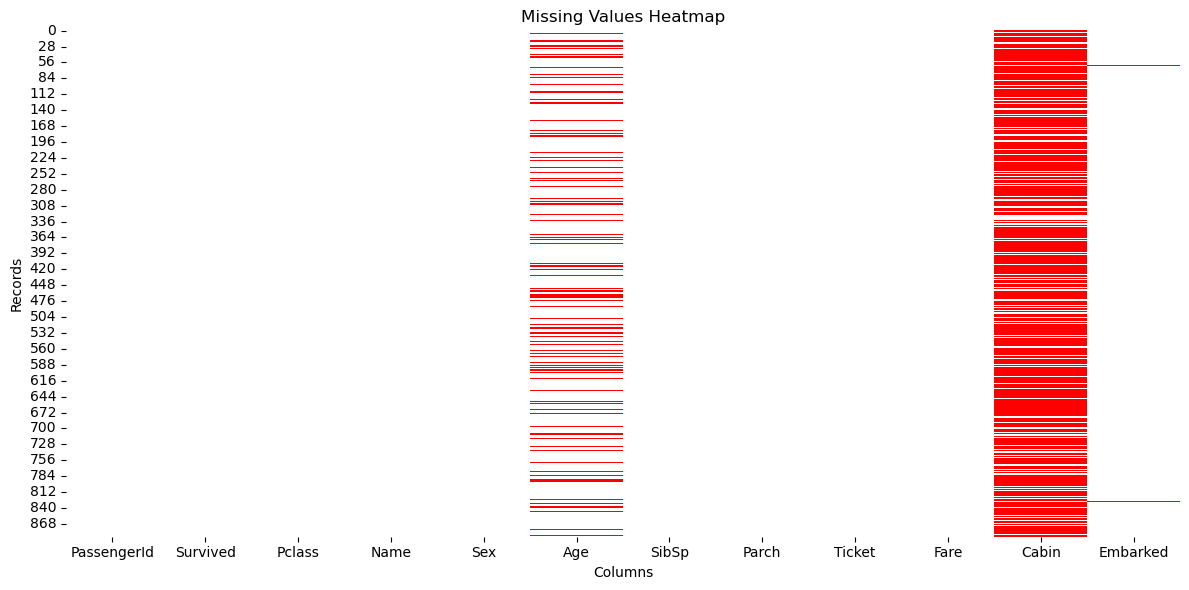

In [76]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap=ListedColormap(['white', 'red']), cbar=False)
plt.title("Missing Values Heatmap")
plt.xlabel("Columns")
plt.ylabel("Records")
plt.tight_layout()
plt.show()


In [77]:
# Fill missing values
df.fillna({'Age': df['Age'].median()}, inplace=True)           
df.fillna({'Embarked': df['Embarked'].mode()[0]}, inplace=True)  
df['Cabin'].fillna('Unknown', inplace=True)
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)  # Drop unnecessary columns

C:\Users\nagar\AppData\Local\Temp\ipykernel_11136\2201513265.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.338481 -0.064910 -0.035322  0.081629  0.257307
Pclass   -0.338481  1.000000 -0.339898  0.083081  0.018443 -0.549500
Age      -0.064910 -0.339898  1.000000 -0.233296 -0.172482  0.096688
SibSp    -0.035322  0.083081 -0.233296  1.000000  0.414838  0.159651
Parch     0.081629  0.018443 -0.172482  0.414838  1.000000  0.216225
Fare      0.257307 -0.549500  0.096688  0.159651  0.216225  1.000000


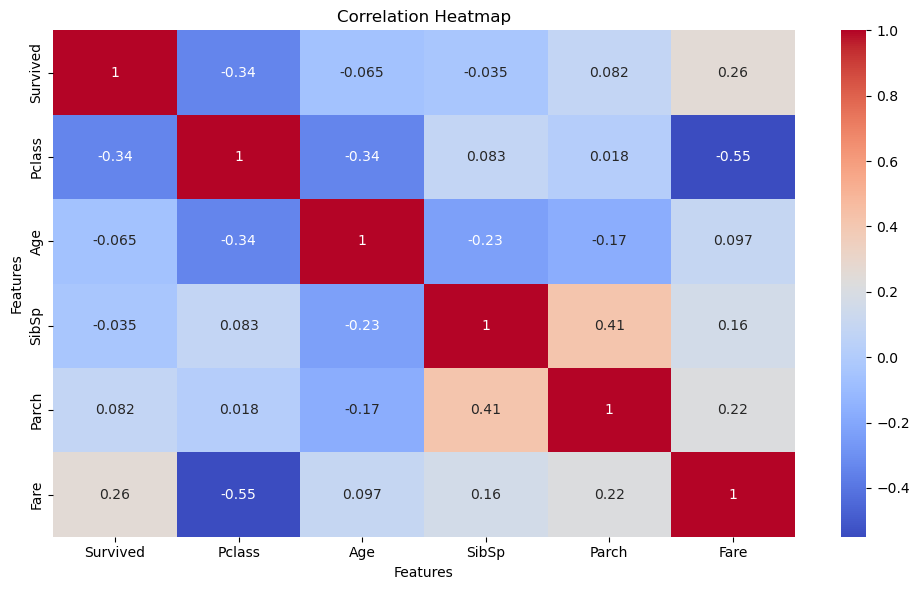

In [78]:
corr = df.corr(numeric_only=True)
print(corr)

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [79]:
df['Title'] = df['Cabin'].apply(lambda x: 'Rare' if x == 'Unknown' else 'Known')
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['HasCabin'] = df['Cabin'].apply(lambda x: 0 if x == 'Unknown' else 1)


In [80]:
for col in ['Sex', 'Embarked', 'Cabin', 'Title']:
  df[col] = LabelEncoder().fit_transform(df[col])
scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])

print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0         0       3    1 -0.565736      1      0 -0.502445    147         2   
1         1       1    0  0.663861      1      0  0.786845     81         0   
2         1       3    0 -0.258337      0      0 -0.488854    147         2   
3         1       1    0  0.433312      1      0  0.420730     55         2   
4         0       3    1  0.433312      0      0 -0.486337    147         2   

   Title  FamilySize  HasCabin  
0      1    0.059160         0  
1      0    0.059160         1  
2      1   -0.560975         0  
3      0    0.059160         1  
4      1   -0.560975         0  


In [85]:
scaler = StandardScaler()
X = df.drop("Survived", axis=1)
y = df["Survived"]
X_scaled = scaler.fit_transform(X)

print(df.head())


   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Cabin  Embarked  \
0         0       3    1 -0.565736      1      0 -0.502445    147         2   
1         1       1    0  0.663861      1      0  0.786845     81         0   
2         1       3    0 -0.258337      0      0 -0.488854    147         2   
3         1       1    0  0.433312      1      0  0.420730     55         2   
4         0       3    1  0.433312      0      0 -0.486337    147         2   

   Title  FamilySize  HasCabin  
0      1    0.059160         0  
1      0    0.059160         1  
2      1   -0.560975         0  
3      0    0.059160         1  
4      1   -0.560975         0  


In [94]:


X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print("Train:", X_train.shape)
print("Validation:", X_val.shape)
print("Test:", X_test.shape)


Train: (534, 11)
Validation: (178, 11)
Test: (179, 11)


In [95]:
def evaluate_model(name, model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    
    if name == "Linear Regression":
        y_proba = model.predict(X_val)
        y_pred = (y_proba >= 0.5).astype(int)
    else:
        y_pred = model.predict(X_val)
        y_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else y_pred

    roc_auc = roc_auc_score(y_val, y_proba)
    f1 = f1_score(y_val, y_pred)
    acc = accuracy_score(y_val, y_pred)
    fpr, tpr, _ = roc_curve(y_val, y_proba)
    
    print(f"MODEL: {name}")
    print("==============================")
    
    print("Accuracy:", acc)
    print("F1 Score:", f1)
    print("ROC AUC:", roc_auc)

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Did Not Survive", "Survived"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix: {name}")
    plt.tight_layout()
    plt.show()


    return {
        "Model": name,
        "Accuracy": acc,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "FPR": fpr,
        "TPR": tpr
    }


MODEL: KNN
Accuracy: 0.7415730337078652
F1 Score: 0.6567164179104478
ROC AUC: 0.7844251336898396


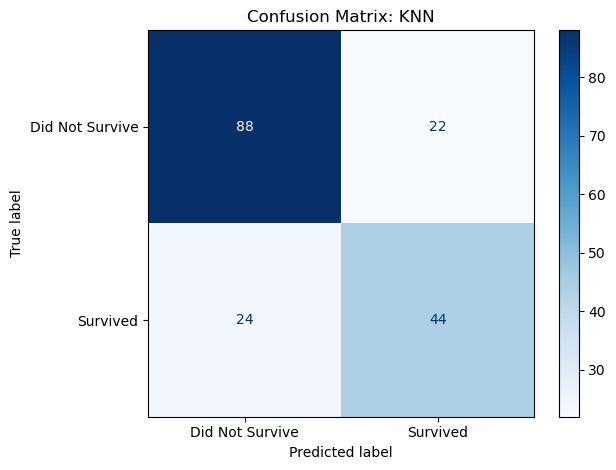

MODEL: Decision Tree
Accuracy: 0.7808988764044944
F1 Score: 0.6929133858267716
ROC AUC: 0.7576871657754011


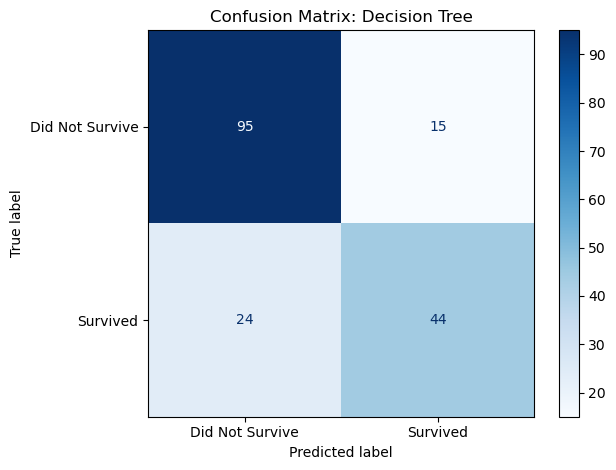

MODEL: Naive Bayes
Accuracy: 0.7247191011235955
F1 Score: 0.5811965811965812
ROC AUC: 0.8249331550802139


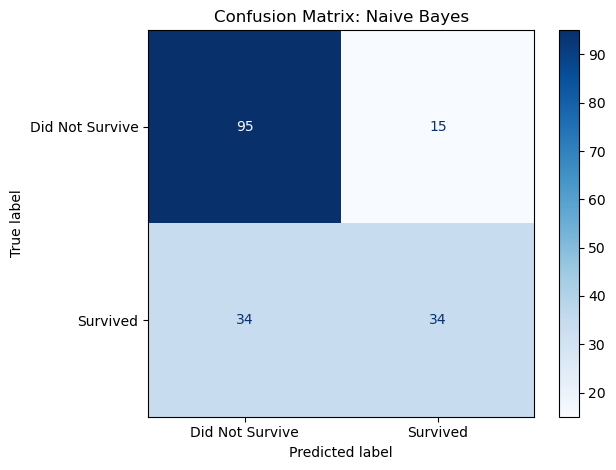

MODEL: Logistic Regression
Accuracy: 0.8426966292134831
F1 Score: 0.7878787878787878
ROC AUC: 0.8783422459893048


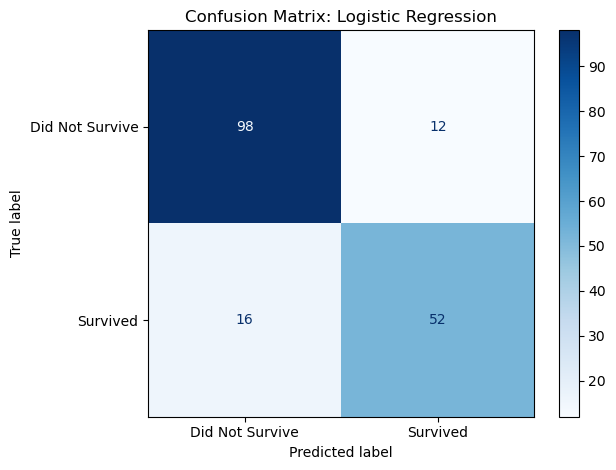

MODEL: SVM
Accuracy: 0.6910112359550562
F1 Score: 0.48598130841121495
ROC AUC: 0.8018716577540107


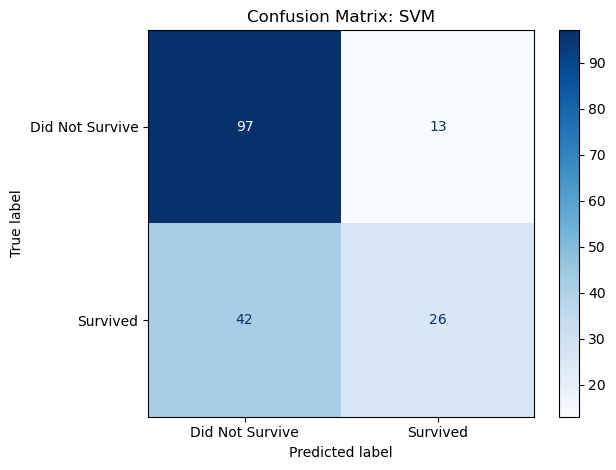

MODEL: Linear Regression
Accuracy: 0.8370786516853933
F1 Score: 0.7851851851851852
ROC AUC: 0.8759358288770053


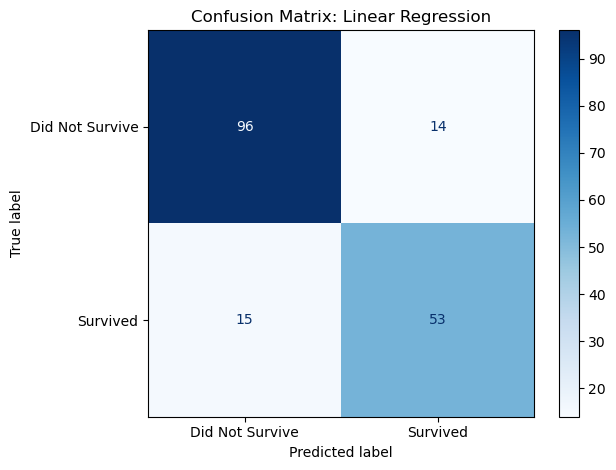

FINAL MODEL COMPARISON
                 Model  Accuracy  F1 Score   ROC AUC
0                  KNN  0.741573  0.656716  0.784425
1        Decision Tree  0.780899  0.692913  0.757687
2          Naive Bayes  0.724719  0.581197  0.824933
3  Logistic Regression  0.842697  0.787879  0.878342
4                  SVM  0.691011  0.485981  0.801872
5    Linear Regression  0.837079  0.785185  0.875936


In [96]:
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(probability=True),
    "Linear Regression": LinearRegression()
}

results = []
for name, model in models.items():
    results.append(evaluate_model(name, model, X_train, y_train, X_val, y_val))

results_df = pd.DataFrame(results).drop(columns=["FPR", "TPR"])


print("FINAL MODEL COMPARISON")
print("==============================")
print(results_df)


C:\Users\nagar\AppData\Local\Temp\ipykernel_11136\1424639574.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="F1 Score", data=results_df, palette="mako")


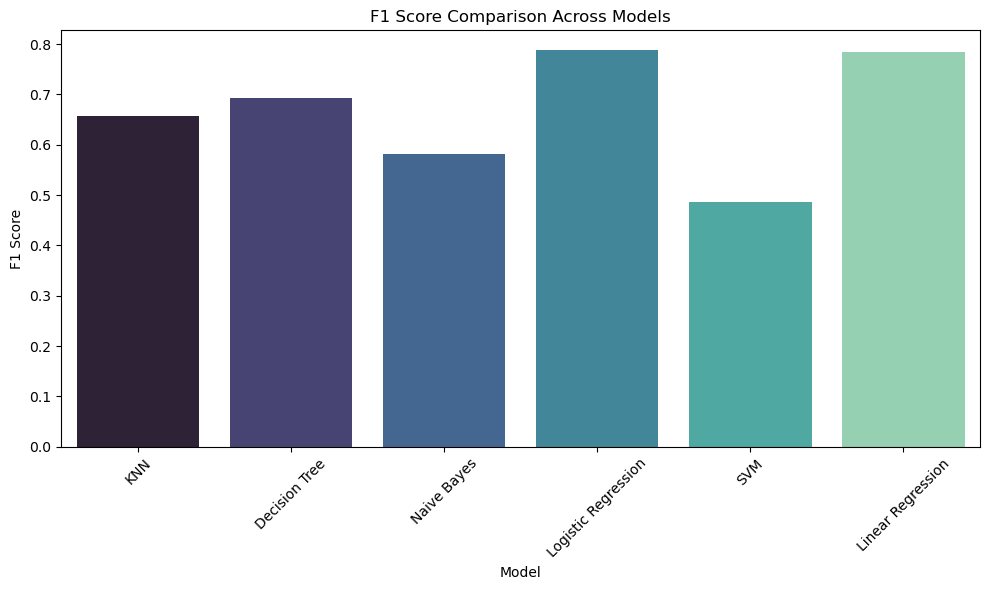

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1 Score", data=results_df, palette="mako")
plt.title("F1 Score Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("F1 Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


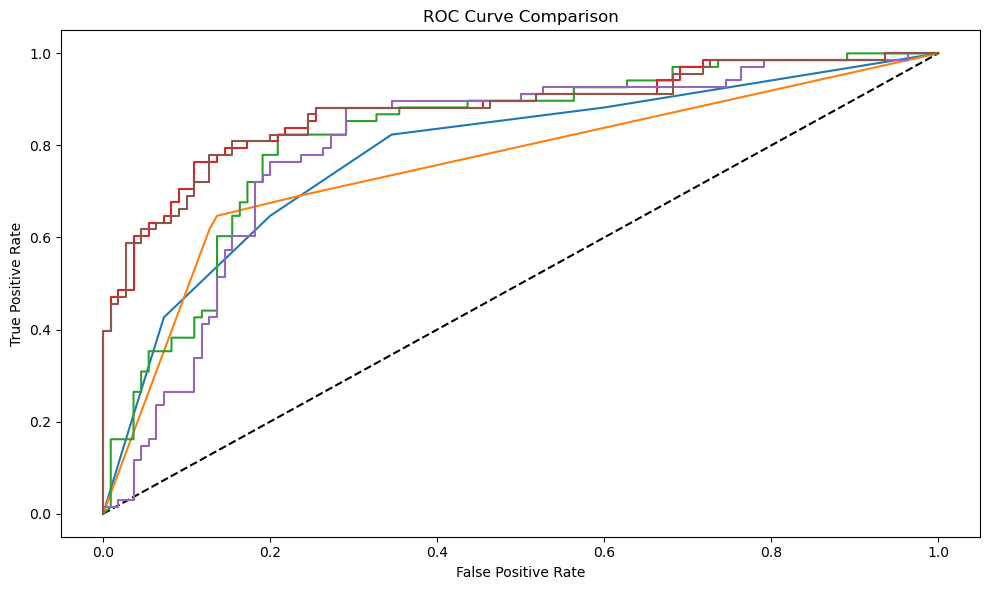

In [98]:
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
for result in results:
    plt.plot(result["FPR"], result["TPR"], label=f"{result['Model']} (AUC = {result['ROC AUC']:.2f})")

plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.tight_layout()
plt.show()
